# Imports

In [1]:
import sys
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
project_path = os.path.abspath(os.path.join('..'))

if project_path not in sys.path:
    sys.path.append(f'{project_path}/src/visualizations/')
    
from covid_data_viz import CovidDataViz    

# Goal
My goal is to visualize various aspect of the `COVID-19` pandemic.

# Data sources

In this project I use data from the following sources:
- https://github.com/CSSEGISandData/COVID-19 - JHU CSSE COVID-19 Data.
- https://datahub.io/JohnSnowLabs/country-and-continent-codes-list - country codes and continents.

# Data loading

In [3]:
cdv = CovidDataViz()

# Fancy plot

Visual for repo readme.

In [4]:
def create_plot(width, height, dpi, period, step, 
                fontsize, fontfamily, n_clabels, 
                countries, suffix, spinewidth=0.5):
    
    # Data prep
    df = cdv.data['Confirmed chg'][countries].copy()
    df = df.rename(columns={'United Kingdom': 'UK'})
    countries = df.columns.to_list()
    df = df.rolling(period)
    df = df.mean()
    df = df.dropna()
    df = df.to_numpy()
    df = df.astype(float)
    df = df.transpose()
    df = np.sqrt(df)

    # Plot
    size = (width / dpi, height / dpi)
    plt.figure(figsize=size, dpi=dpi)
    plt.imshow(df, aspect='auto', interpolation='nearest')
    plt.set_cmap('hot')      
    
    # Plot pines
    ax = plt.gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(spinewidth)    

    # Plot labels
    xticks = range(df.shape[1])[::step]
    xlabels = list(cdv.data['Confirmed chg']['Date'])[period:]
    xlabels = [x.strftime(format='%Y-%m') for x in xlabels]
    xlabels = xlabels[::step]

    yticks = range(len(countries))
    ylabels = countries

    plt.yticks(ticks=yticks, labels=ylabels, fontsize=fontsize, 
               family=fontfamily, verticalalignment='center')

    plt.xticks(ticks=xticks, labels=xlabels, rotation=45, 
               fontsize=fontsize, family=fontfamily,
               horizontalalignment='center')

    ax.tick_params(width=spinewidth, color='black')
    
    # Colorbar
    cticks = np.round(np.linspace(0, np.max(df), 6), -1)
    cticks = cticks.astype(np.int)
    clabels = np.power(cticks, 2)
    cticks = sorted(set(cticks))
    clabels = np.power(cticks, 2)
    clabels = [int((round(x, -3)) / 1000) for x in clabels]
    clabels = [str(x) + 'k' for x in clabels]

    cbar = plt.colorbar()
    cbar.set_ticks(cticks)
    cbar.set_ticklabels(clabels)
    cbar.ax.tick_params(labelsize=fontsize, width=1/2) 

    for l in cbar.ax.yaxis.get_ticklabels():
        l.set_family(fontfamily)

    cbar.outline.set_linewidth(spinewidth)
        
    plt.title('New COVID-19 cases', fontsize=fontsize + 2,
              family=fontfamily)

    plt.tight_layout()
    plt.savefig(fname=f'../img/covid_tiles_{suffix}.png', 
                bbox_inches='tight')

    plt.show()

In [5]:
countries = ['Germany', 
             'France', 
             'Italy', 
             'Spain', 
             'United Kingdom', 
             'Russia', 
             'India', 
             'Brazil',
             'US', 
             'Poland', 
             'Mexico']

countries = sorted(countries)

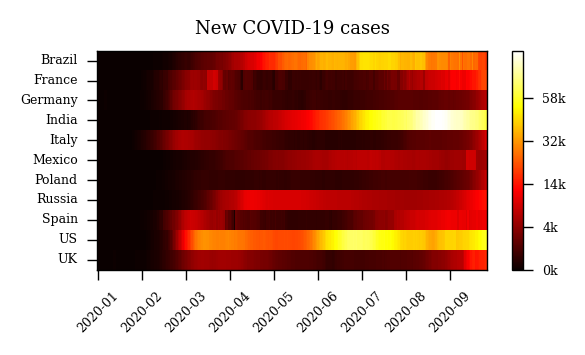

In [6]:
create_plot(width=625,
            height=375,
            dpi=200,
            period=7,
            step=30,
            fontsize=4.5,
            fontfamily='serif',
            n_clabels=6,
            countries=countries,
            suffix='portfolio_readme')

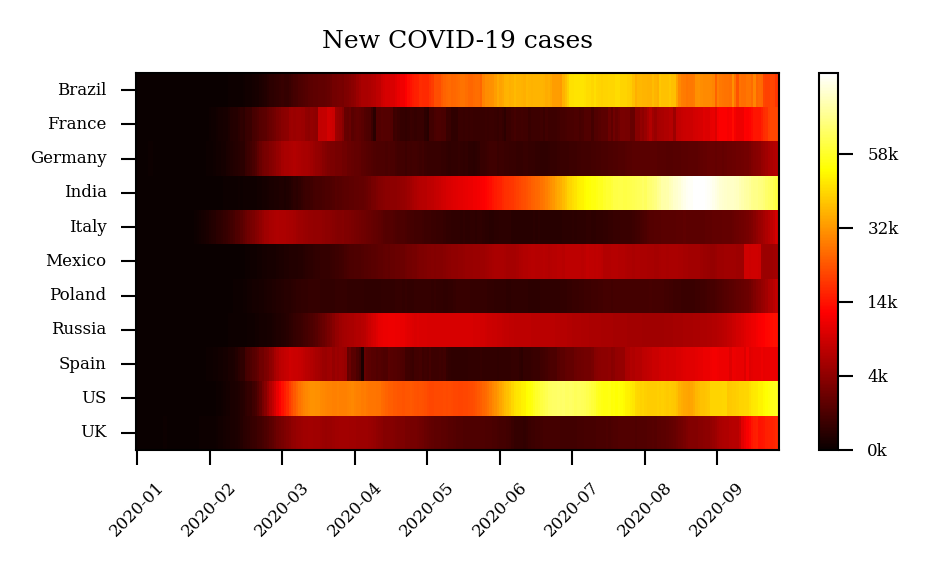

In [7]:
create_plot(width=1000,
            height=600,
            dpi=300,
            period=7,
            step=30,
            fontsize=4,
            fontfamily='serif',            
            n_clabels=6,
            countries=countries,
            suffix='project_readme')